In [1]:
# 모듈 import
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 코랩 드라이브 설정
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/ACADEMY_first_project')

In [27]:
# 한글깨짐방지 모듈 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,933 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123069 files and di

# 1. GCC 선정 이유

# 1-0. GCC 국가에 대한 설명

In [ ]:
GCC : 걸프 협력 회의 ( 사우디 아라비아, 아랍에미리트 중심의 중동지역 6개국 )

저희는 외부데이터 자료로 통계청(KOSIS) 데이터를 이용해서 집계했습니다.

SyntaxError: invalid decimal literal (3506195582.py, line 1)

# 1-1. 2010년 1월 데이터에서 GCC 국가의 성장률이 높았음

Text(0.5, 1.0, '성장률 TOP5(%)')

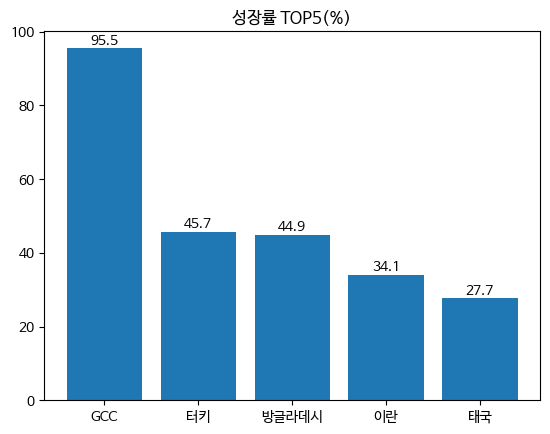

In [5]:
# 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')

# 201001 자료에서 성장률 상위5개 추출하기
df = pd.read_excel('foreign_201001.xlsx')

# 칼럼 재 설정하기
df1 = df.rename(columns=df.iloc[0])
df2 = df1.drop(df.index[0],inplace = False)

# 인덱스 재 설정하기
df2.index = df2['국적'].values
df2.drop(['국적'],axis=1,inplace = True)

# 성장률 top5 추출하기
df3 = df2[['성장률(%)']]
df4 = df3.rename(columns={'성장률(%)': 'growthrate'})  # sort_values메소드에서 한글 인식이 안되는 문제
df5 = df4.sort_values('growthrate',ascending=False)
top_5 = df5.head(5)

# 막대그래프
x = top_5.index
y = top_5.growthrate

plt.bar(x,y)

for i in range(len(x)):      # 그래프에 숫자 표시
    plt.text(x[i], y[i], str(y[i]), va='bottom', ha='center')  # 위치에 y값 표시

plt.title('성장률 TOP5(%)')

# 2-1. GCC 국가 사람들의 방한관광객 수 집계

In [6]:
# 2010부터 2019까지 GCC의 방한객 수 그래프

data = pd.DataFrame()            # 빈 데이터프레임 생성

# 파일명 foreign_201001 부터 foreign_201912까지 차례로 데이터프레임에 붙이기 위한 코드
for j in range(0,10):            # 2010부터 2019까지
    for i in range(1,13):        # j가 2010이면 201001부터 201012까지
        if i // 10 == 0:         # 뒤에 두 자리가 한자리 수이면
            i = "0"+str(i)       # 뒤에 문자열 타입으로 01 과 같이 붙인다.
        else:                    # 뒤의 것이 두자리 수이면
            i = str(i)           # 그대로 문자열

        df = pd.read_excel(f'foreign_201{str(j)}{i}.xlsx')   # fstring으로 설정한 i, j을 이용해서 파일 읽기
        df = df.rename(columns = df.loc[0]).loc[1:].set_index('국적')    # 데이터를 사용하기 편하게 칼럼과 인덱스 이름을 바꿨음
        gcc = df.loc[['GCC']]                 # 그중 gcc의 데이터만 골라서
        data = pd.concat([data,gcc], ignore_index=True)     # 만들었던 데이터프레임에 concat으로 붙이고 같은 이름으로 저장


data_2010_2019 = data     # 헷갈릴 것 같아서 완성된 데이터프레임의 이름 새롭게 지정했음
periods = pd.Series(pd.period_range(start = '2010-01', freq = 'M', periods = 120))   # 각 데이터들의 인덱스를 지정하기 위한 period 객체 생성 201001 부터 201912까지
data_2010_2019.index = periods
data_2010_2019

,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%)
2010-01,223,134,0,18,55,430,220,95.5,0.1
2010-02,305,101,5,24,37,472,321,47,0.1
2010-03,356,113,1,23,49,542,397,36.5,0.1
2010-04,476,134,18,6,57,691,408,69.4,0.1
2010-05,647,155,19,10,63,894,515,73.6,0.1
...,...,...,...,...,...,...,...,...,...
2019-08,4922,15,19,178,151,5285,4267,23.9,0.3
2019-09,2187,30,6,135,104,2462,1964,25.4,0.2
2019-10,2237,25,18,55,94,2429,2392,1.5,0.1
2019-11,2404,25,12,65,69,2575,1986,29.7,0.2


In [7]:
# 선형회귀분석 : GCC에서온 방한객의 경향을 확인하기 위함

data_2010_2019['x'] = range(1,121)
# 선형회귀분석을 위해서는 y = ax + b 라는 1차방정식에서 x에 숫자가 필요한데
# 저희 데이터는 숫자형이 아니라 날짜 데이터 타입의 문자열이기 때문에
# 이것을 대체하기 위한 임의의 x 값 칼럼을 하나 만들었다.

data_2010_2019

,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%),x
2010-01,223,134,0,18,55,430,220,95.5,0.1,1
2010-02,305,101,5,24,37,472,321,47,0.1,2
2010-03,356,113,1,23,49,542,397,36.5,0.1,3
2010-04,476,134,18,6,57,691,408,69.4,0.1,4
2010-05,647,155,19,10,63,894,515,73.6,0.1,5
...,...,...,...,...,...,...,...,...,...,...
2019-08,4922,15,19,178,151,5285,4267,23.9,0.3,116
2019-09,2187,30,6,135,104,2462,1964,25.4,0.2,117
2019-10,2237,25,18,55,94,2429,2392,1.5,0.1,118
2019-11,2404,25,12,65,69,2575,1986,29.7,0.2,119


In [8]:
# 선형회귀분석

x = data_2010_2019['x'].astype(np.float64)    # dtype('o') --> dtype(float64)로 바꿈
                                              # 데이터 타입이 Object 인데, 선형회귀분석을 위해서는 숫자형데이터가 필요하기 때문에
                                              # astype으로 float 타입으로 바꾸어 계산하였다.
y = data_2010_2019['관광'].astype(np.float64)


z = np.polyfit(x, y, 1)     # 기울기와 절편 확인
#  다항식으로 데이터를 근사하는 데에 사용하는 함수
#  np.polyfit(x값, y값, 차수)


f = np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
                 # 1차원 다항식을 생성하는 클래스로
                 # f는 poly1d 객체가 됩니다.
                 # np.polyfit()함수와 함께 사용되어
                 # 계산된 다항식 계수를 바탕으로 1차원 다항식객체를 생성한다.

f       # 선형회귀 함수 확인
        # 앞에가 기울기, 뒤에가 y절편

poly1d([ 19.12436975, 445.40896359])

In [9]:
print(z)

[ 19.12436975 445.40896359]


In [10]:
list(f)

[19.12436974789915, 445.4089635854346]

In [11]:
f[0]

445.4089635854346

In [12]:
# 데이터프레임에 계산한 함수 y값을 매핑
data_2010_2019['y1'] = f[1]*x+f[0]   # y = ax + b
                                     # a는 기울기, b는 y절편

# 보통의 인덱싱의 경우 df[0]은 맨 앞의 것으로 인식하는데
# 확인해보니 poly1d객체에서는 순서가 바뀌어 있었다.??


data_2010_2019

,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%),x,y1
2010-01,223,134,0,18,55,430,220,95.5,0.1,1,464.533333
2010-02,305,101,5,24,37,472,321,47,0.1,2,483.657703
2010-03,356,113,1,23,49,542,397,36.5,0.1,3,502.782073
2010-04,476,134,18,6,57,691,408,69.4,0.1,4,521.906443
2010-05,647,155,19,10,63,894,515,73.6,0.1,5,541.030812
...,...,...,...,...,...,...,...,...,...,...,...
2019-08,4922,15,19,178,151,5285,4267,23.9,0.3,116,2663.835854
2019-09,2187,30,6,135,104,2462,1964,25.4,0.2,117,2682.960224
2019-10,2237,25,18,55,94,2429,2392,1.5,0.1,118,2702.084594
2019-11,2404,25,12,65,69,2575,1986,29.7,0.2,119,2721.208964


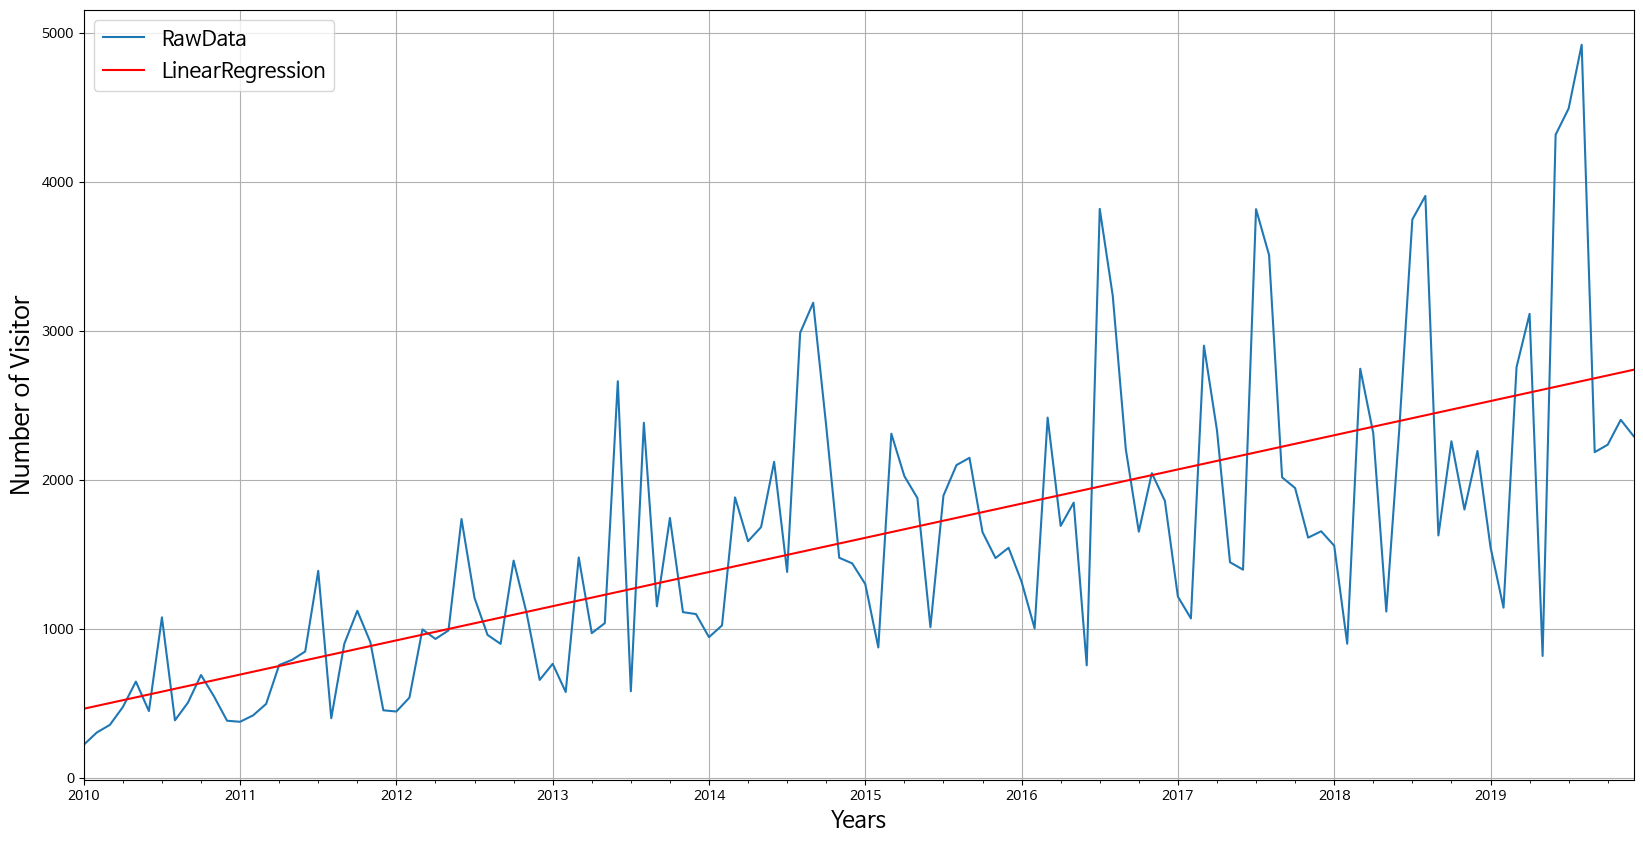

In [13]:
# GCC 방한객 수 그래프 그리기

# GCC 방한객 수 RawData
data_2010_2019['관광'].plot(figsize = (20,10),  grid = True, label = 'RawData')  # 범례를 위해 label을 붙임


# 선형회귀선
data_2010_2019['y1'].plot(figsize = (20,10), grid = True, label = 'LinearRegression', color='r')

plt.xlabel('Years', fontsize = 16)
plt.ylabel('Number of Visitor', fontsize = 18)
plt.legend(fontsize = 15)  # 범례를 표시함

# 2-2  데이터중 관광

In [ ]:
2019년 이전 데이터들은 GCC로 나뉘지 않고 대부분 중동지역에 포함된 데이터들이 많기도 하고,
plot에서 봤을 때, 2019년이 제일 방한객수가 많아서 후에 나올 모든 자료들을 2019년 것을 사용했다.

SyntaxError: invalid decimal literal (2857114928.py, line 1)

# 2-3 GCC 방한객의 관광목적

Text(0.5, 1.0, 'GCC 방한객 관광목표(%)')

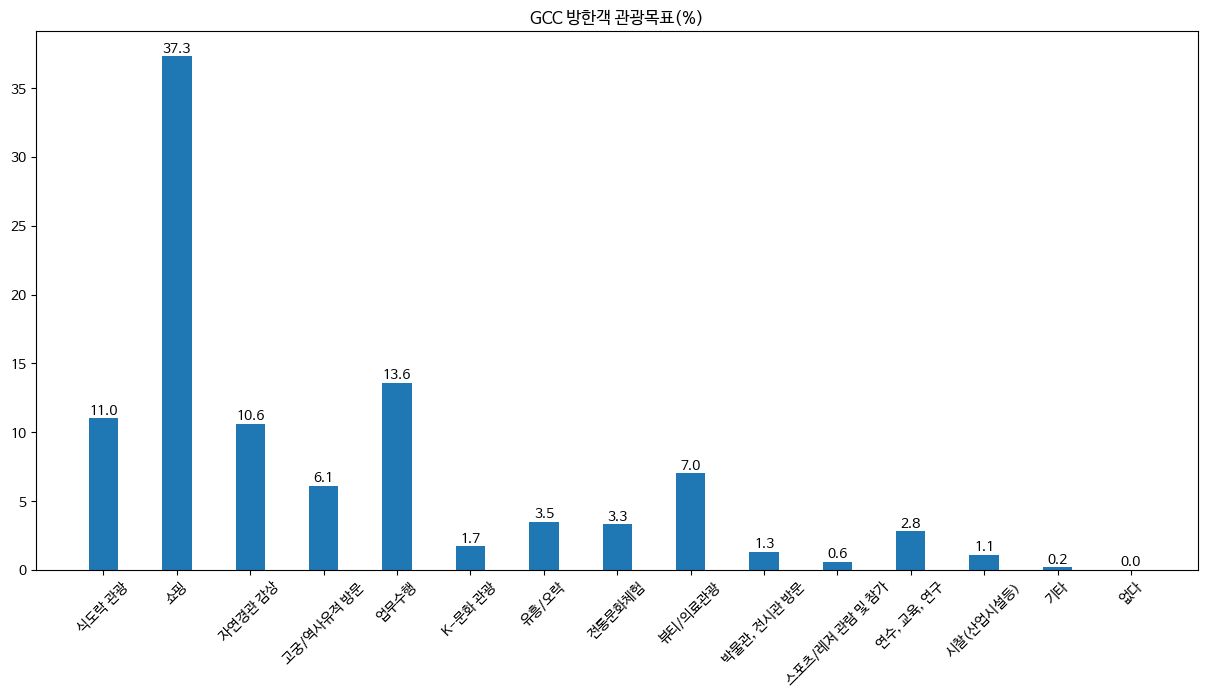

In [16]:
#나라별 관광 목적 데이터에서 GCC 관광 목적 추출하기
df = pd.read_csv('GCC_tour.csv')

# 데이터에서 GCC 추출하기
df = pd.DataFrame(df.loc[18])
df = df.drop('통계분류(1)')
df = df.drop('통계분류(2)')
df = df.rename(columns={18: 'GCC'})
df = df.drop('계')
df.rename(index = {'K-POP/한류스타 관련 촬영지 방문' : 'K-문화 관광'},inplace = True)

#경고메시지 무시
import warnings
warnings.filterwarnings(action='ignore')
# 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')
#그래프그리기
plt.figure(figsize = (15,7))

x = df.index
y = df.GCC

plt.bar(x,y,width = 0.4)
plt.xticks(rotation = 45)
for i in range(len(x)):      # 그래프에 숫자 표시
    plt.text(x[i], y[i], str(y[i]), va='bottom', ha='center')  # 위치에 y값 표시

plt.title("GCC 방한객 관광목표(%)")

# 2-4. GCC 방한객의 특징(추가조사)

In [17]:
# 1인당 지출경비(쇼핑)자료

expend_shopping2019 = pd.DataFrame(pd.read_csv('1인_지출_경비__전체_쇼핑__20230417113122.csv', encoding = 'cp949')) # cp949 파일을 읽음
# 운영체제가 MS인 것은 인코딩방식이 cp949이고
# Max이나 리눅스 인 것은 인코딩방식이 UTF-8이라서 MS 방식으로 인코딩을 맞췄습니다

expend_shopping2019.rename(index = expend_shopping2019['통계분류(2)'],       # 데이터의 인덱스와 칼럼을 원하는 모양으로 변경
                          columns = expend_shopping2019.loc[0],
                          inplace = True)

expend_shopping2019 = expend_shopping2019.iloc[14:38 , 3:]    # 의미없는 부분 슬라이싱

In [18]:
# 상위 10개 나라

expend_shopping2019 = expend_shopping2019.astype(float)         # 숫자들이 문자열로 돼 있어서 실수로 변경
expend_10 = expend_shopping2019.sort_values(by = '평균', ascending = False)[:10]   # 평균지출 top10 추출
expend_10

,50달러초과 100달러이하,100달러초과 200달러이하,200달러초과 500달러이하,500달러초과,최대금액초과,평균
중국,2.0,6.8,24.5,59.9,0.7,1030.0
GCC,3.2,8.2,24.1,50.3,1.7,849.2
몽골,5.5,13.5,28.5,46.1,2.2,787.9
베트남,5.1,12.4,38.5,35.6,0.3,601.2
중동,9.5,14.4,32.6,26.3,1.2,475.9
인도네시아,10.5,16.1,45.9,20.8,0.1,444.9
대만,8.1,17.0,42.5,25.8,0.3,435.8
홍콩,6.7,18.8,38.3,28.1,0.1,427.7
중앙아시아,11.2,17.0,32.6,23.0,1.1,411.7
기타중동,9.2,11.2,38.3,19.4,1.2,403.2


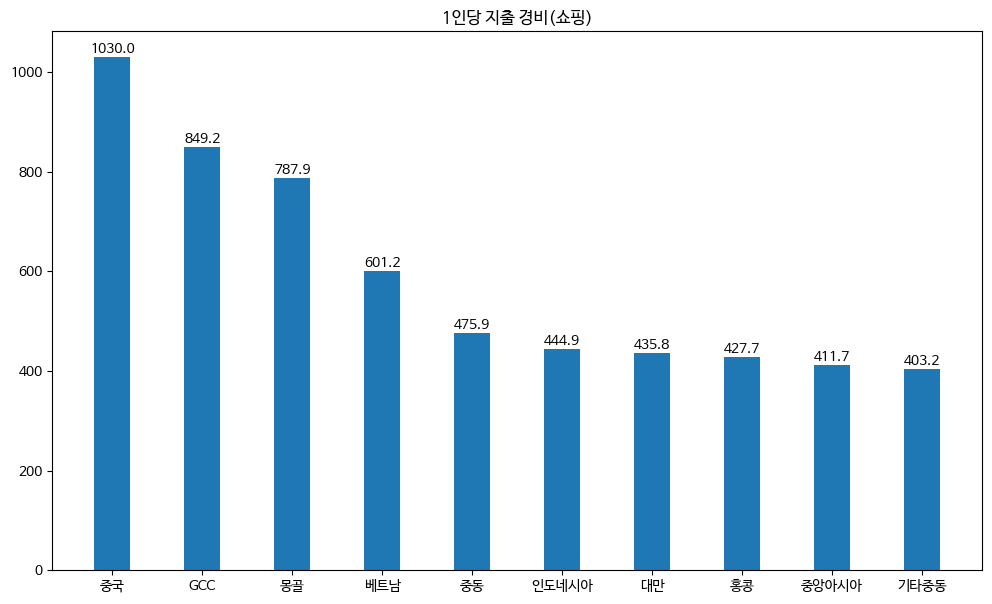

In [20]:
# 1인당 지출비용 상위 10개국 막대그래프

plt.figure(figsize = (12,7))        # 그림 size

plt.rc('font', family='NanumBarunGothic')   # 한글 꺠짐 현상 방지

expend_avg = expend_10['평균']

x = expend_avg.index
y = expend_avg

# 막대그래프
plt.bar(x,y, width = 0.4)

# 그래프에 숫자 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]),va='bottom', ha='center')  # 위치에 y값 표시
                                                              # va : vertical alignment
                                                              # ha : horizontal alignment

plt.title(  '1인당 지출 경비(쇼핑)')
plt.show()

# 3-1. 장소 (주로 어디를 가는지)

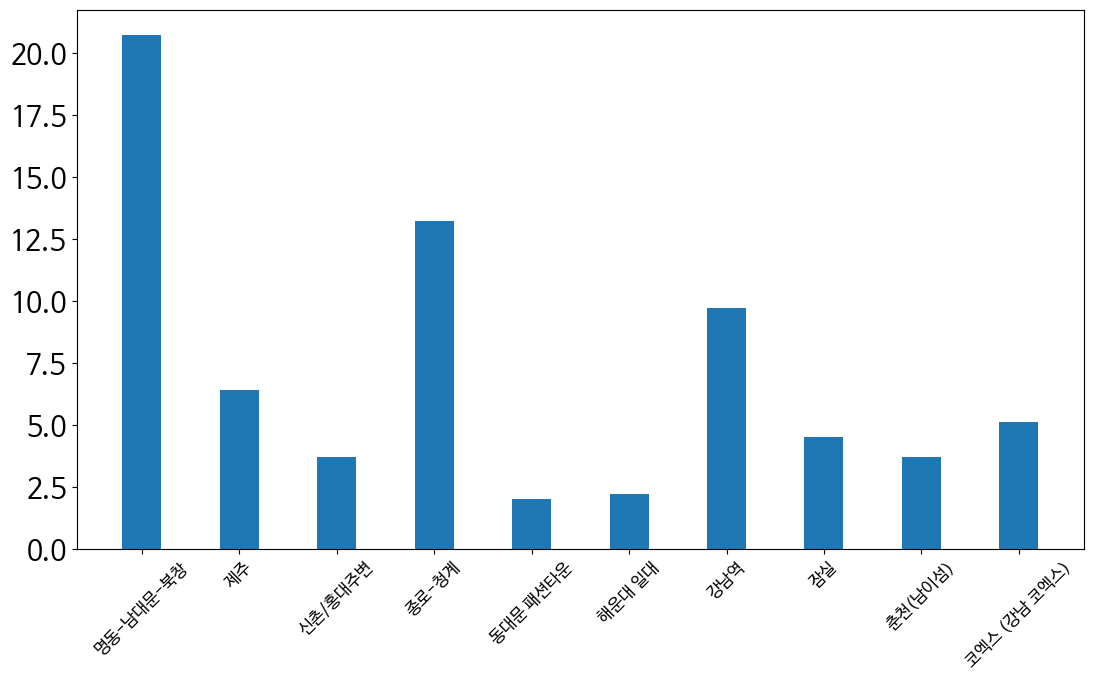

In [21]:
# GCC 방한객들이 방문하는 장소

import warnings
warnings.filterwarnings(action='ignore')   # 워닝 메세지 무시

# 데이터 추출
gcc = pd.read_csv('shop.csv', encoding='cp949') # 운영체제별로 인코딩 방식 다름. MS : cp949, 맥,리눅스 : UTF-8
gcc_2 = gcc.iloc[617:627,:7]
gcc_2.drop('단위',axis=1,inplace=True) # 단위 컬럼은 모두 NaN 값이라 drop으로 삭제했음
gcc_2.rename(columns={'통계분류':'나라','항목':'장소'},inplace=True) # 컬럼 이름 변경


# 막대그래프
plt.figure(figsize=(13,7))
plt.bar(gcc_2['장소'],gcc_2['2019 년'], width = 0.4) # x값 : 장소 , y값 : 2019년도의 방문 퍼센트
plt.yticks(fontsize=20) # y축 눈금들의 값 폰트사이즈 변경
plt.xticks(fontsize=12,rotation=45) # x축 눈금들의 값 폰트사이즈, 글씨 각도 변경
plt.show()
plt.rc('font', family='NanumBarunGothic')   # matplotlib 그래프 한글 글씨 표기

# 3-2. 지역에서 주요 쇼핑 목록 ( 무엇을 구매하는지 )

In [22]:
# 나라별 쇼핑목록 데이터 추출
items2019 = pd.DataFrame(pd.read_csv('주요_쇼핑_품목_중복_응답__20230417161717.csv', encoding = 'cp949'))
items2019.rename(index = items2019.iloc[:,1], columns = items2019.loc[0], inplace=True)  # 인덱스와 칼럼 변경
items2019 = items2019.iloc[14:38, 2:]   # 데이터 슬라이싱
df1 = items2019.loc[['GCC','중동'],:]
df1

,향수 화장품,식료품(김치 김 과자 등),의류,신발류,인삼 한약재,가방류,액세서리 보석류,담배,전통민예품 칠기 목각제품,한류 스타 관련상품(음반 DVD 캐릭터 상품 등),주류,기 타,쇼핑하지않음
GCC,59,23.1,55.9,31.6,9.8,21.7,19.6,4,8,11.5,2.3,2.2,10.1
중동,57.1,31.4,58.2,26.7,11.1,7.4,13.5,2.2,11.1,5.7,2.6,2,11.5


In [23]:
# 중동과 비교하기위한 데이터프레임 설정

df1 = df1.T      # 전치행렬로 행과 열을 바꿨다.
df1

,GCC,중동
향수 화장품,59,57.1
식료품(김치 김 과자 등),23.1,31.4
의류,55.9,58.2
신발류,31.6,26.7
인삼 한약재,9.8,11.1
가방류,21.7,7.4
액세서리 보석류,19.6,13.5
담배,4,2.2
전통민예품 칠기 목각제품,8,11.1
한류 스타 관련상품(음반 DVD 캐릭터 상품 등),11.5,5.7


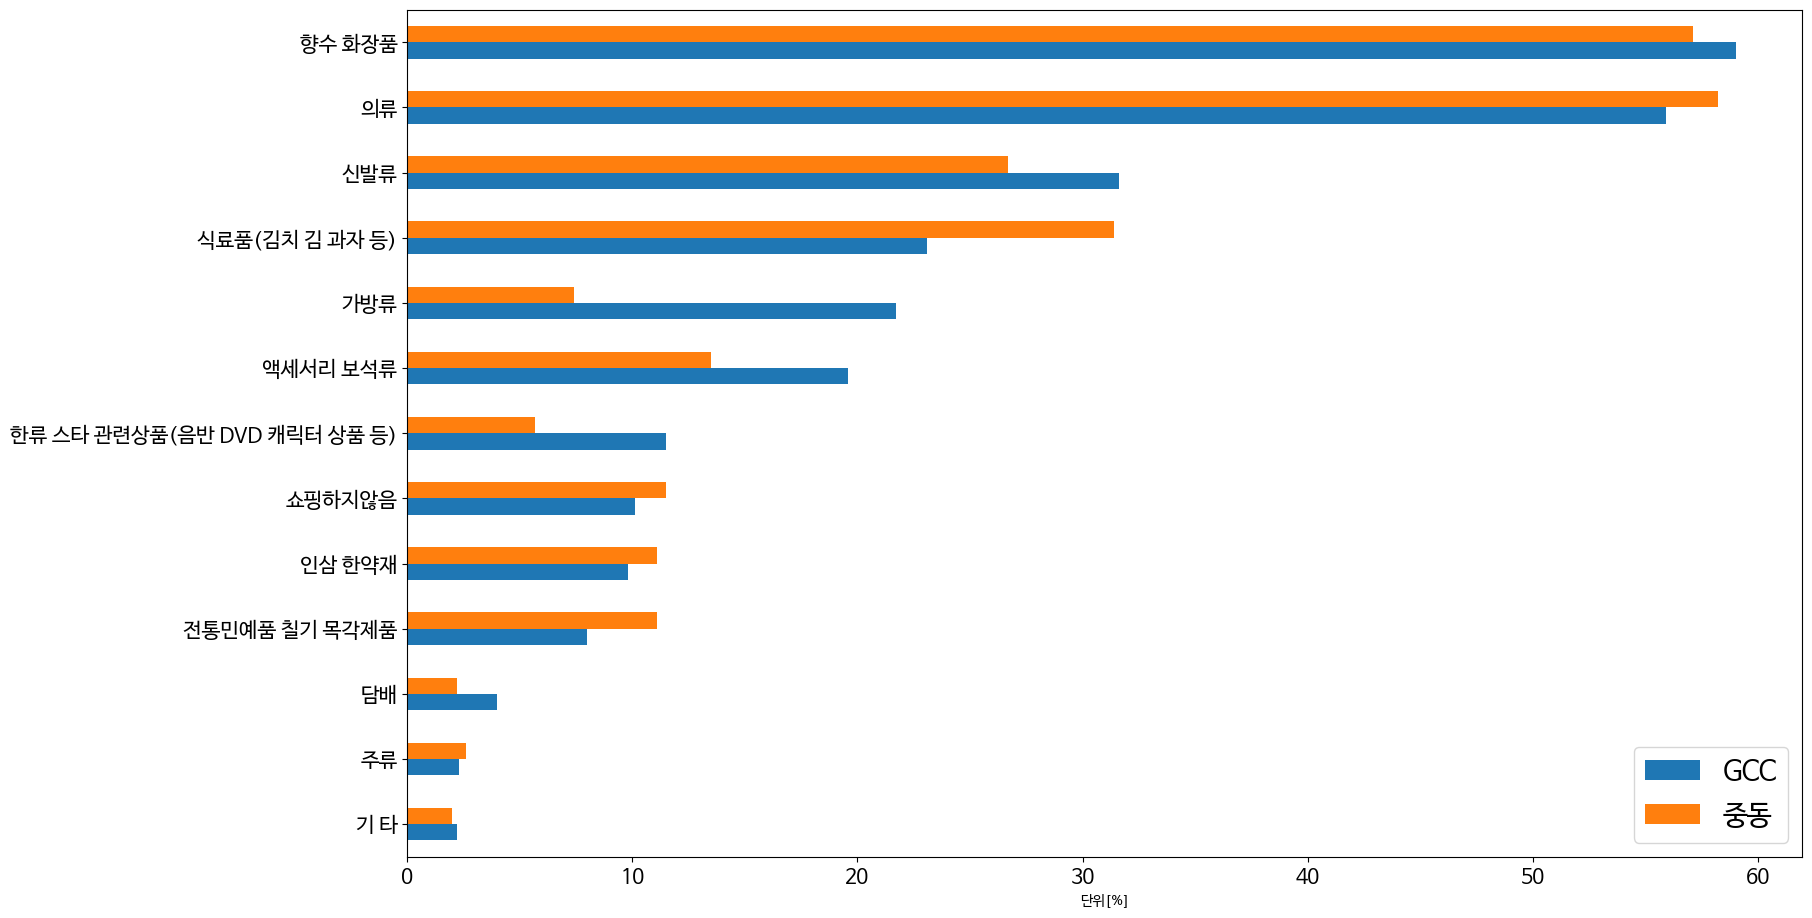

In [24]:
# 중동과 비교한 그래프 그리기

df1 = df1.astype(float)                   # 문자열 -> 실수
df1.sort_values(by = 'GCC',inplace = True)   # GCC를 기준으로 내림차순 정렬
plt.rc('font', family='NanumBarunGothic')  # 한글깨짐 방지

df1.plot(kind = 'barh', figsize = (18,11), xlabel = '단위[%]', fontsize = 15)  # barh plot
plt.legend(fontsize = 20)

# 4. 결론